In [80]:
# type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [81]:
# Url for dataset
url = "https://archive.ics.uci.edu/static/public/544/data.csv"

# File path for dataset 
filepath = "./dataset/PRSA_data_2010.1.1-2014.12.31.csv"

# Can use any of the above url or filepath
df = pd.read_csv(url)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [82]:
df.shape

(2111, 17)

In [83]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [84]:
# Data Cleaning
# Checking for null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [85]:
# Checking for duplicates
df.duplicated().sum()

24

In [86]:
# Since duplicate values are present, dropping them
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [87]:
# Checking the info of data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [88]:
# select dtypes of object
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [89]:
# convert to categorical values
for col in object_columns:
    print(df[col].value_counts(), '\n')


Gender
Male      1052
Female    1035
Name: count, dtype: int64 

family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64 

FAVC
yes    1844
no      243
Name: count, dtype: int64 

CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64 

SMOKE
no     2043
yes      44
Name: count, dtype: int64 

SCC
no     1991
yes      96
Name: count, dtype: int64 

CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64 

MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64 

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64 



In [90]:
# convert to categorical values
for col in object_columns:
    df[col] = df[col].astype("category").cat.codes

df.dtypes.value_counts()

int8       9
float64    8
Name: count, dtype: int64

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,2087.0,0.504073,0.500103,0.00,0.000000,1.000000,1.000000,1.00
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
family_history_with_overweight,2087.0,0.825108,0.379966,0.00,1.000000,1.000000,1.000000,1.00
FAVC,2087.0,0.883565,0.320823,0.00,1.000000,1.000000,1.000000,1.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CAEC,2087.0,1.853857,0.459494,0.00,2.000000,2.000000,2.000000,3.00
SMOKE,2087.0,0.021083,0.143695,0.00,0.000000,0.000000,0.000000,1.00


In [92]:
df['NObeyesdad'].value_counts()

NObeyesdad
2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: count, dtype: int64

In [93]:
obesity = pd.get_dummies(df, drop_first=True)
X = obesity.drop('NObeyesdad', axis=1)
y = obesity['NObeyesdad']

In [94]:
# Check the distribution of target vector
y.value_counts()

NObeyesdad
2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: count, dtype: int64

The labels in target vector are almost equally distributed.

In [95]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (2087, 16)
y shape: (2087,)


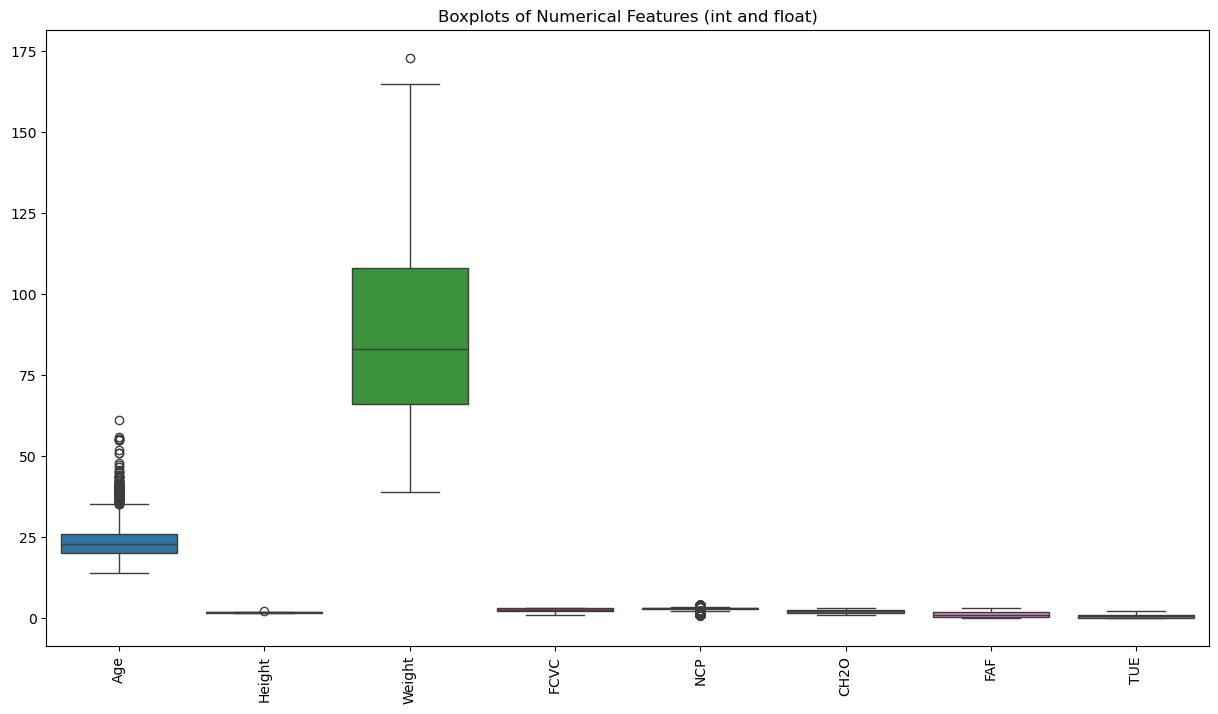

In [96]:
def visualize_outliers(X):
    """
    Visualizes outliers in the numerical columns (both int and float) of a DataFrame using boxplots.

    Parameters:
    X (pd.DataFrame): The input DataFrame containing numerical columns. The function 
                       will select columns of data types 'int64' and 'float64' for visualization.

    Returns:
    None: The function displays boxplots for each numerical feature in the DataFrame to 
          help identify potential outliers.

    Notes:
    - The function filters numerical features of types 'int64' and 'float64'.
    - Outliers are visualized as points outside the interquartile range (IQR) of each feature.
    - Boxplots display the median, quartiles, and potential outliers in the data.
    """
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=X.select_dtypes(include=['float64', 'int64'])) 
    plt.xticks(rotation=90)  
    plt.title("Boxplots of Numerical Features (int and float)")
    plt.show()


visualize_outliers(X)

In [97]:
def clip_outliers(X):
    """
    Clips the outliers in the numerical columns (both int64 and float64) of a DataFrame
    using the Interquartile Range (IQR) method. Outliers are replaced with the respective
    upper or lower limit.

    Parameters:
    X (pd.DataFrame): The input DataFrame containing numerical columns of types
                       'int64' and 'float64'.

    Returns:
    dict: A dictionary with feature names as keys and the count of outliers removed
          from each feature as values.

    """
    numerical_features = X.select_dtypes(include=["float64", "int64"]).columns
    outlier_counts = {}

    for feature in numerical_features:
        Q1 = X[feature].quantile(0.25)
        Q3 = X[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Clip the outliers
        X[feature] = X[feature].clip(lower=lower_limit, upper=upper_limit)

        # Store count of outliers
        outliers = X[(X[feature] < lower_limit) | (X[feature] > upper_limit)]
        outlier_counts[feature] = outliers.shape[0]

    return outlier_counts

clip_outliers(X)

{'Age': 0,
 'Height': 0,
 'Weight': 0,
 'FCVC': 0,
 'NCP': 0,
 'CH2O': 0,
 'FAF': 0,
 'TUE': 0}

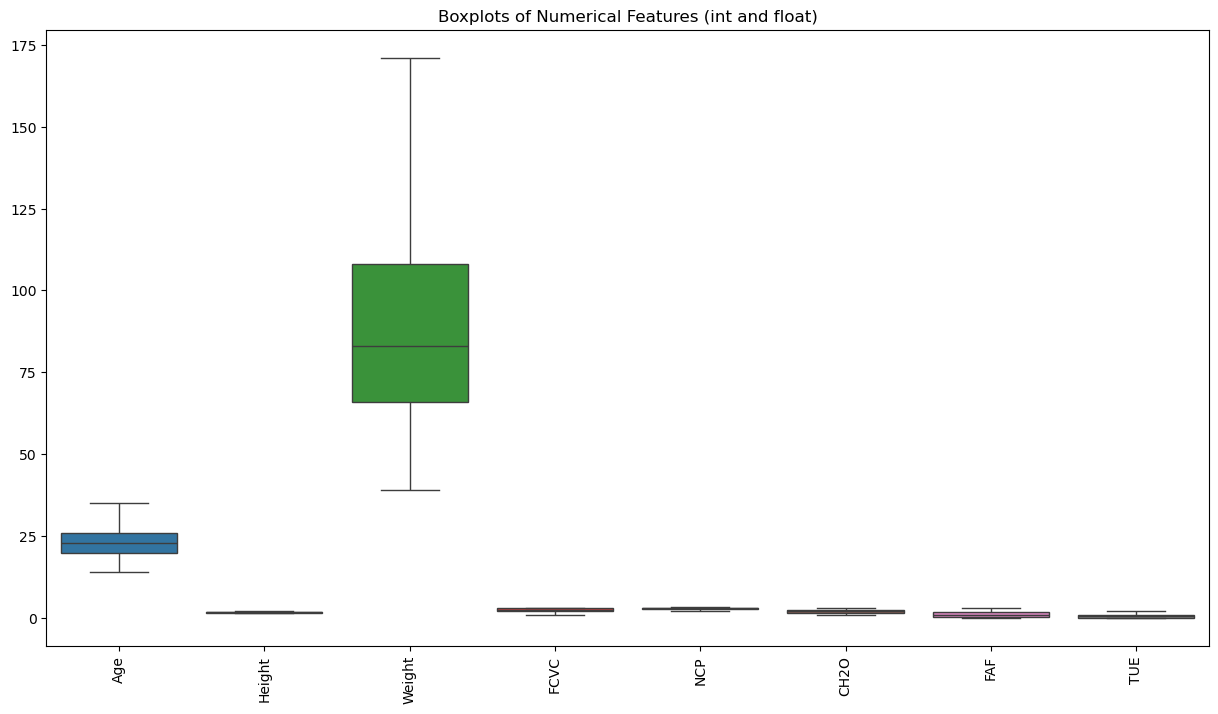

In [98]:
visualize_outliers(X);

In [99]:
# Checking Correlation
corr_matrix = df.corr(numeric_only=True)
corr_matrix


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.050641,0.626748,0.163176,0.113492,0.061220,-0.271575,0.077863,0.074564,0.045501,0.095129,-0.102435,0.189471,0.022356,0.010574,-0.139044,0.014699
Age,0.050641,1.000000,-0.031748,0.198160,0.200379,0.063895,0.013572,-0.055823,0.092097,0.091261,-0.044058,-0.117959,-0.148202,-0.302927,-0.045565,-0.601476,0.238308
Height,0.626748,-0.031748,1.000000,0.457468,0.232258,0.180694,-0.040363,0.227806,0.058001,0.054326,0.220487,-0.137078,0.293584,0.041808,-0.135756,-0.068258,0.038700
Weight,0.163176,0.198160,0.457468,1.000000,0.492969,0.274655,0.216574,0.092149,0.300271,0.024369,0.203823,-0.205409,-0.056490,-0.079351,-0.211351,0.009836,0.388802
family_history_with_overweight,0.113492,0.200379,0.232258,0.492969,1.000000,0.214329,0.033199,0.028411,0.207738,0.014885,0.168627,-0.193947,-0.062937,0.002314,0.028403,-0.092730,0.330391
FAVC,0.061220,0.063895,0.180694,0.274655,0.214329,1.000000,-0.025419,-0.006398,0.147921,-0.050713,0.002993,-0.191277,-0.111184,0.071505,-0.087661,-0.069422,0.041023
FCVC,-0.271575,0.013572,-0.040363,0.216574,0.033199,-0.025419,1.000000,0.034885,-0.038565,0.013716,0.081332,0.071179,0.022003,-0.104128,-0.063132,0.069012,0.025728
NCP,0.077863,-0.055823,0.227806,0.092149,0.028411,-0.006398,0.034885,1.000000,-0.072316,0.005009,0.075335,-0.020461,0.127816,0.015693,-0.082985,-0.043648,-0.088235
CAEC,0.074564,0.092097,0.058001,0.300271,0.207738,0.147921,-0.038565,-0.072316,1.000000,-0.054960,0.114801,-0.109393,-0.034803,-0.036708,-0.039502,-0.058158,0.314510
SMOKE,0.045501,0.091261,0.054326,0.024369,0.014885,-0.050713,0.013716,0.005009,-0.054960,1.000000,-0.031642,0.047384,0.010811,0.016491,-0.083181,-0.009995,-0.023341


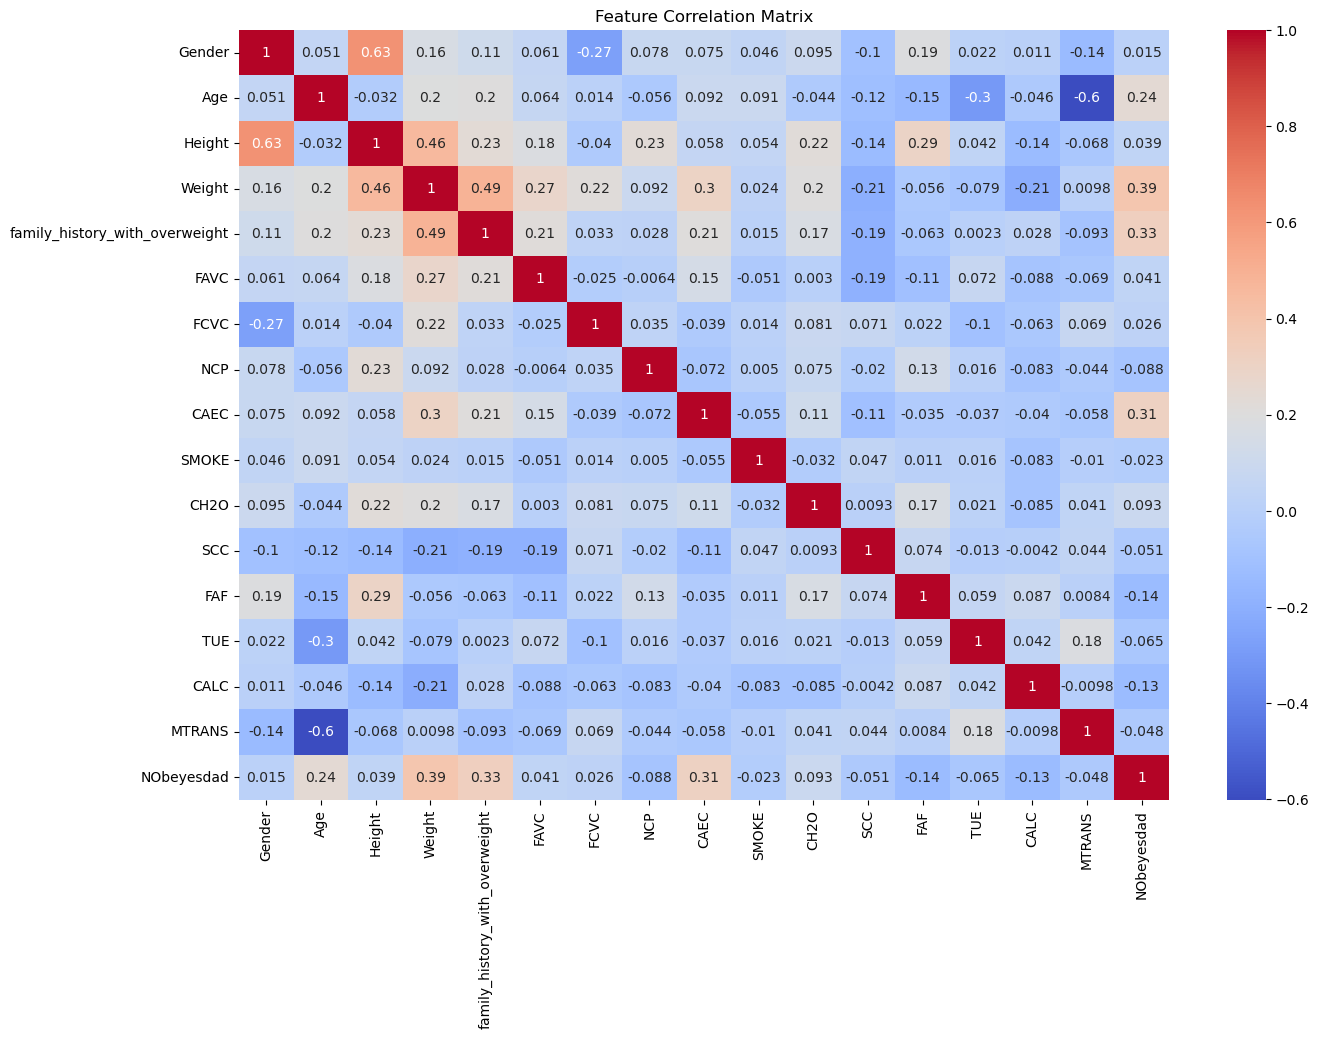

In [100]:
# EDA - Exploratory Data Analysis
plt.figure(figsize=(15,10))
sns.heatmap(obesity.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

The correlation analysis with the target variable `NObeyesdad` (obesity) shows that `Weight` has the highest positive correlation with obesity levels which seem obvious, followed by `Height` and `Age`. `FCVC` (frequency of vegetable consumption) and `FAF` (frequency of physical activity) also show moderate correlations. Features like `Gender`, `SMOKE`, and `SCC` (caloric consumption monitoring) have lower correlations, indicating a weaker relationship with obesity levels.

In [101]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [102]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int8   
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int8   
 5   FAVC                            2087 non-null   int8   
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int8   
 9   SMOKE                           2087 non-null   int8   
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   int8   
 12  FAF                             2087 no

In [104]:
type(X_train)

pandas.core.frame.DataFrame

In [105]:
# Softmax Regression from scratch 
class SoftmaxRegression:
    """
    Softmax Regression (also known as Multinomial Logistic Regression) model for classification.

    This model uses the softmax function to perform multi-class classification, where each class 
    has a probability output, and the class with the highest probability is chosen as the prediction.

    Attributes:
        learning_rate (float): The learning rate used for gradient descent.
        epochs (int): The number of iterations for training.
        weights (numpy.ndarray): The learned weights of the model.
        bias (numpy.ndarray): The learned bias of the model.
    """
    
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the SoftmaxRegression model with a given learning rate and number of epochs.

        Args:
            learning_rate (float): The learning rate used for gradient descent (default is 0.01).
            epochs (int): The number of epochs (iterations) to run gradient descent (default is 1000).
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def softmax(self, z):
        """
        Compute the softmax function on the input array z.

        Softmax is used to convert the raw model outputs (logits) into probabilities for each class.

        Args:
            z (numpy.ndarray): The input array, typically the result of a linear combination of features 
                               and weights, plus bias. The shape of z should be (n_samples, n_classes).
        
        Returns:
            numpy.ndarray: The softmax probabilities, with the same shape as the input array.
        """
        exp = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability improvement by subtracting max
        return exp / np.sum(exp, axis=1, keepdims=True)
    
    def fit(self, X, y):
        """
        Train the Softmax Regression model using gradient descent.

        Args:
            X (numpy.ndarray): The input features, where each row represents a sample and each column 
                                represents a feature. The shape should be (n_samples, n_features).
            y (numpy.ndarray): The true labels for each sample. The values in y should be integers representing 
                                the class labels. The shape should be (n_samples,).
        """
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Initialize weights and bias
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)
        
        # Convert y to one-hot encoding
        y_onehot = np.zeros((n_samples, n_classes))
        y_onehot[np.arange(n_samples), y] = 1
        
        # Gradient descent
        for _ in range(self.epochs):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(z)
            
            # Backward pass (compute the error and update weights and bias)
            error = y_pred - y_onehot
            self.weights -= self.learning_rate * np.dot(X.T, error) / n_samples
            self.bias -= self.learning_rate * np.sum(error, axis=0) / n_samples
    
    def predict(self, X):
        """
        Predict the class labels for the input samples.

        Args:
            X (numpy.ndarray): The input features for which to make predictions. The shape should be (n_samples, n_features).
        
        Returns:
            numpy.ndarray: The predicted class labels for each input sample. The shape is (n_samples,).
        """
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(z)
        return np.argmax(y_pred, axis=1)


In [106]:
# Initialize and fit the model
custom_logreg = SoftmaxRegression(learning_rate=0.1, epochs=1000)
custom_logreg.fit(X_train.values, y_train.values)

# Make predictions
y_pred_softmax = custom_logreg.predict(X_test.values)
y_pred_softmax[0:5]

array([4, 6, 6, 6, 4], dtype=int64)

In [107]:
# Model Evaluation
recall_softmax = recall_score(y_test, y_pred_softmax, average="macro")
print(f"Recall Score for Softmax Regression: {recall_softmax:.2f}");

precision_softmax = precision_score(y_test, y_pred_softmax, average="macro", zero_division= False)
print(f"Precision Score for Softmax Regression: {precision_softmax:.2f}");

f1_softmax = f1_score(y_test, y_pred_softmax, average = "macro")
print(f"F1 Score for Softmax Regression: {f1_softmax:.2f}");


Recall Score for Softmax Regression: 0.35
Precision Score for Softmax Regression: 0.19
F1 Score for Softmax Regression: 0.23


Build Two Models using sklearn

In [108]:
# Naive Bayes (Multinomial Naive Bayes)
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

y_pred_nb = naive_bayes.predict(X_test)
y_pred_nb[:5]

array([4, 3, 2, 5, 3], dtype=int8)

In [109]:
# Model Evaluation of Naive Bayes
recall_nb = recall_score(y_test, y_pred_nb, average="macro")
print(f"Recall Score for Naive Bayes: {recall_nb:.2f}")

precision_nb = precision_score(y_test, y_pred_nb, average="macro", zero_division= False)
print(f"Precision Score for Naive Bayes: {precision_nb:.2f}")

f1_nb = f1_score(y_test, y_pred_nb, average = "macro")
print(f"F1 Score for Naive Bayes: {f1_nb:.2f}")


Recall Score for Naive Bayes: 0.60
Precision Score for Naive Bayes: 0.61
F1 Score for Naive Bayes: 0.59


Based on the metrics, it can be infered that multinomial outperformed softmax regression built from scratch.

In [110]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_pred_rf[:5]

array([2, 3, 5, 0, 3], dtype=int8)

In [111]:
# Evaluate models
class_models = {
    "Custom Logistic": custom_logreg,
    "NB": naive_bayes,
    "Random Forest": rf_clf,
}

for name, model in class_models.items():
    if name == "Custom Logistic":
        y_pred = model.predict(X_test.values)
    else:
        y_pred = model.predict(X_test)
    print(
        f"{name} \nAccuracy: {accuracy_score(y_test, y_pred):.2f}, F1: {f1_score(y_test, y_pred, average='macro'):.2f}\n"
    )

Custom Logistic 
Accuracy: 0.33, F1: 0.23

NB 
Accuracy: 0.60, F1: 0.59

Random Forest 
Accuracy: 0.96, F1: 0.95



**Hyper Parameter tuning and cross validation for Naive Bayes**

In [112]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

nb_clf = MultinomialNB()

grid_search = GridSearchCV(nb_clf, param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

best_nb = grid_search.best_estimator_

y_pred_nb = best_nb.predict(X_test)

print("First 5 predictions:", y_pred_nb[:5])

accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'alpha': 1.0, 'fit_prior': False}
First 5 predictions: [4 3 2 1 3]
Accuracy: 63.32%


**Hyper Parameter tuning and cross validation for Random Forest Classifier**

In [113]:
param_grid_clf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}

grid_search_clf = GridSearchCV(
    RandomForestClassifier(), param_grid_clf, cv=5, n_jobs=-1, verbose=1
)
grid_search_clf.fit(X_train, y_train)

print("Best parameters found:", grid_search_clf.best_params_)

best_rf_clf = grid_search_clf.best_estimator_

y_pred_rf = best_rf_clf.predict(X_test)

print("First 5 predictions:", y_pred_rf[:5])

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
First 5 predictions: [2 3 5 0 3]
Accuracy: 95.22%


**Feature Selection for Naive Bayes Using Mutual Information**

In [114]:
# Use mutual information to select top 5 features
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()

# Train Naive Bayes with best parameters from previous grid search on selected features
best_nb = MultinomialNB(alpha=grid_search.best_params_['alpha'], 
                       fit_prior=grid_search.best_params_['fit_prior'])
best_nb.fit(X_train_selected, y_train)

# Make predictions with selected features
y_pred_nb_selected = best_nb.predict(X_test_selected)

# Evaluate model with selected features
print("Selected features:", selected_features)
print(f"Accuracy with selected features: {accuracy_score(y_test, y_pred_nb_selected):.4f}")
print(f"F1 score with selected features: {f1_score(y_test, y_pred_nb_selected, average='macro'):.4f}")

Selected features: ['Age', 'Height', 'Weight', 'FCVC', 'CH2O']
Accuracy with selected features: 0.3796
F1 score with selected features: 0.3766


**Feature Selection for Random Forest Using Feature Importance**

In [115]:
# Get feature importance scores from best random forest model
feature_importance_rf = best_rf_clf.feature_importances_

# Create a DataFrame with features and their importance scores
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance_rf
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Select top 5 features
top_features_rf = feature_importance_df['feature'].head(5).tolist()

# Create new training and test sets with selected features
X_train_selected_rf = X_train[top_features_rf]
X_test_selected_rf = X_test[top_features_rf]

# Train Random Forest with best parameters on selected features
best_rf_selected = RandomForestClassifier(**grid_search_clf.best_params_)
best_rf_selected.fit(X_train_selected_rf, y_train)

# Make predictions with selected features
y_pred_rf_selected = best_rf_selected.predict(X_test_selected_rf)

# Evaluate model with selected features
print("Top 5 features:", top_features_rf)
print(f"Accuracy with selected features: {accuracy_score(y_test, y_pred_rf_selected):.4f}")
print(f"F1 score with selected features: {f1_score(y_test, y_pred_rf_selected, average='macro'):.4f}")

Top 5 features: ['Weight', 'Height', 'FCVC', 'Age', 'Gender']
Accuracy with selected features: 0.9665
F1 score with selected features: 0.9651


In this case, random forest classifier outperformed multinomial naive bayes. So, for the final model building I will go with random forest classifier.

**Final Model Building**

In [116]:
# Final Model
X_train_selected_clf = X_train[top_features_rf]
X_test_selected_clf = X_test[top_features_rf]

In [117]:
best_rf_clf.fit(X_train_selected_clf, y_train)
final_pred_clf = best_rf_clf.predict(X_test_selected_clf)
print(
    f"Final Model: \nAccuracy: {accuracy_score(y_test, final_pred_clf):.2f}, F1: {f1_score(y_test, final_pred_clf, average='macro'):.2f}"
)

Final Model: 
Accuracy: 0.96, F1: 0.96
